<a href="https://colab.research.google.com/github/junheeyoon/colab/blob/main/4_5_DL_Tensorflow_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow 과제





## CNN기초
원본 데이터를 2차원으로 놓고 필터(또는 feature detector)라는 사각형 윈도우를 씌운다음에 움직이면서 새로운 값을 만들어 낸다.
이때 움직이는 과정을 convolution이라고 하고, 필터가 움직이는 방향이 한 방향이면 1D-CNN이고 두 방향이면 2D-CNN이다.

1차원 CNN이라 하더라도 필터의 사각형이 반드시 1차원인건 아니다. 움직이는 콘볼루션 방향및 결과로 나오는 배열이 1차원인지 2차원인지 따지는 것

## 2D CNN으로 MNIST 데이터 분류 (워밍업)

### 데이터 읽기

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, Conv1D, MaxPooling2D
from keras import backend as k
import matplotlib.pyplot as plt
import numpy as np
#load mnist dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data() #everytime loading data won't be so easy :)

11493376/11490434 [==============================] - 0s 0us/step


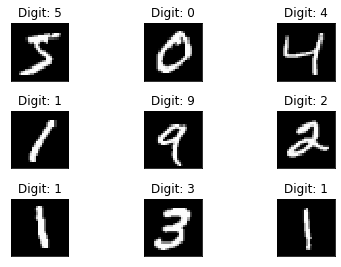

In [2]:
import matplotlib.pyplot as plt
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [3]:
# let's print the actual data shape before we reshape and normalize
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [4]:
#input image size 28*28
img_rows, img_cols = 28, 28

In [5]:
#reshaping
#this assumes our data format
#For 3D data, "channels_last" assumes (conv_dim1, conv_dim2, conv_dim3, channels) while 
#"channels_first" assumes (channels, conv_dim1, conv_dim2, conv_dim3).
if k.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
#more reshaping
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [6]:
print(np.unique(y_train, return_counts=True))
#set number of categories
num_category = 10
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_category)
y_test = keras.utils.to_categorical(y_test, num_category)
y_train[0]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))


array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [7]:
##model building
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Conv1D, MaxPooling1D
model = Sequential()
#convolutional layer with rectified linear unit activation
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
#32 convolution filters used each of size 3x3
#again
model.add(Conv2D(64, (3, 3), activation='relu'))
#64 convolution filters used each of size 3x3
#choose the best features via pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
#randomly turn neurons on and off to improve convergence
model.add(Dropout(0.25))
#flatten since too many dimensions, we only want a classification output
model.add(Flatten())
#fully connected to get all relevant data
model.add(Dense(128, activation='relu'))
#one more dropout for convergence' sake :) 
model.add(Dropout(0.5))
#output a softmax to squash the matrix into output probabilities
model.add(Dense(num_category, activation='softmax'))
#Adaptive learning rate (adaDelta) is a popular form of gradient descent rivaled only by adam and adagrad
#categorical ce since we have multiple classes (10) 
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

batch_size = 128
num_epoch = 10

#model training
model_log = model.fit(
    X_train, 
    y_train,
    batch_size=batch_size,
    epochs=num_epoch,
    verbose=1,
    validation_data=(X_test, y_test))

Epoch 1/10
469/469 [==============================] - 11s 9ms/step - loss: 2.2952 - accuracy: 0.1398 - val_loss: 2.2393 - val_accuracy: 0.4227
Epoch 2/10
469/469 [==============================] - 4s 8ms/step - loss: 2.2333 - accuracy: 0.2655 - val_loss: 2.1624 - val_accuracy: 0.5396
Epoch 3/10
469/469 [==============================] - 4s 8ms/step - loss: 2.1584 - accuracy: 0.3693 - val_loss: 2.0601 - val_accuracy: 0.6133
Epoch 4/10
469/469 [==============================] - 4s 8ms/step - loss: 2.0589 - accuracy: 0.4478 - val_loss: 1.9245 - val_accuracy: 0.6584
Epoch 5/10
469/469 [==============================] - 4s 8ms/step - loss: 1.9289 - accuracy: 0.4966 - val_loss: 1.7551 - val_accuracy: 0.6956
Epoch 6/10
469/469 [==============================] - 4s 8ms/step - loss: 1.7745 - accuracy: 0.5354 - val_loss: 1.5612 - val_accuracy: 0.7283
Epoch 7/10
469/469 [==============================] - 4s 8ms/step - loss: 1.6108 - accuracy: 0.5694 - val_loss: 1.3657 - val_accuracy: 0.7560
Epoch

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [8]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.9203364253044128
Test accuracy: 0.8152999877929688


## 1D CNN으로 MNIST 데이터 분류 (메인, 인터넷에서 찾지 말고 가능한 자신이 구현해 볼 것)

In [9]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 모양 (shape) 확인
print('X_train shape', X_train.shape)

X_train shape (60000, 28, 28)


In [10]:
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D, MaxPooling1D
from keras.layers import Dense, Dropout, Activation
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 784, 1)) 
test_images = test_images.reshape((10000, 784, 1)) 
train_images, test_images = train_images / 255.0, test_images / 255.0

model = Sequential() #모델 생성.

model.add(Conv1D(64, 3, activation='relu', input_shape=(784, 1)))  #Conv1D 모델을 추가한다.

model.add(MaxPooling1D(2)) #Maxpooling 추가를 한다.

model.add(Conv1D(32, 3, activation='relu'))

model.add(MaxPooling1D(2))

model.add(Conv1D(32, 3, activation='relu'))

model.add(Flatten()) 

model.add(Dense(32, activation='relu')) 

model.add(Dense(10, activation='softmax')) 

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=1,verbose=1) 

_, test_acc = model.evaluate(test_images,  test_labels, verbose=2)


1875/1875 [==============================] - 6s 3ms/step - loss: 0.3911 - accuracy: 0.8778
313/313 - 1s - loss: 0.1083 - accuracy: 0.9678


In [ ]:
from tensorflow.keras.utils import to_categorical

# one-hot encoding
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
print('Y_train.shape', Y_train.shape)

In [ ]:
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.layers import Dense, Dropout, Activation

max_features = 5000
maxlen = 784
embedding_dims = 50
filters = 250
kernel_size = 3

model = Sequential()

model.add(Embedding(max_features, embedding_dims, input_length=maxlen))
model.add(Conv1D(filters, kernel_size, padding='valid', activation='relu', strides=1))
model.add(GlobalMaxPooling1D())
model.add(Dense(10))
model.add(Activation('softmax'))

#model.add(Dense(128, input_shape=(784,), activation='relu'))
#model.add(Dense(84, activation='relu'))
#model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
batch_size = 128
num_epoch = 10
hist = model.fit(X_train, Y_train,batch_size=batch_size,
    epochs=num_epoch, verbose=1, validation_data=(X_test, Y_test))

In [ ]:
train_acc = hist.history['accuracy'][-1]
train_loss =  hist.history['loss'][-1]

print('train accuracy: ', train_acc)
print('train loss: ', train_loss)

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])